In [2]:
#Прочитайте csv файл (використовуйте функцію read_csv)
import pandas as pd
df = pd.read_csv('./bestsellers with categories.csv')

In [3]:
#Виведіть перші п'ять рядків (використовується функція head)
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [5]:
#Виведіть розміри датасету (використовуйте атрибут shape)
print('Розмір датасету:', df.shape)

Розмір датасету: (550, 7)


In [6]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

In [14]:
#Відповідь: 
print('Чи є в якихось змінних пропуски? (Так / ні)')
if df.isna().any().any():
    print('Так')
else:
    print('ні')

Чи є в якихось змінних пропуски? (Так / ні)
ні


In [15]:
#Відповідь: 
print('Які є унікальні жанри?')
unique_genres = df['genre'].unique()
for genre in unique_genres:
    print(genre)

Які є унікальні жанри?
Non Fiction
Fiction


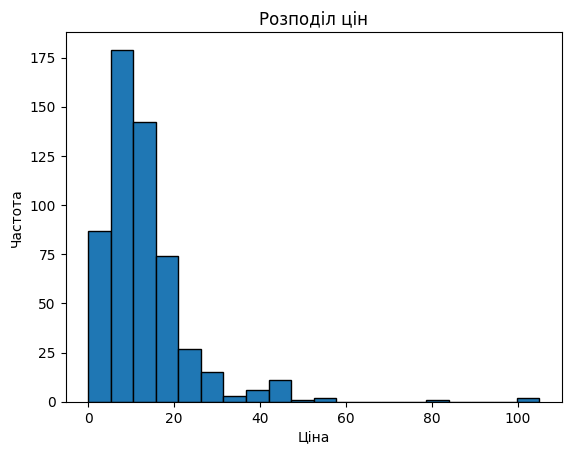

Максимальна ціна: 105
Мінімальна ціна: 0
Середня ціна: 13.1
Медіанна ціна: 11.0


In [16]:
#Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')
import matplotlib.pyplot as plt

df['price'].plot(kind='hist', bins=20, edgecolor='black')
plt.xlabel('Ціна')
plt.ylabel('Частота')
plt.title('Розподіл цін')
plt.show()

max_price = df['price'].max()
min_price = df['price'].min()
mean_price = df['price'].mean()
median_price = df['price'].median()

print(f"Максимальна ціна: {max_price}")
print(f"Мінімальна ціна: {min_price}")
print(f"Середня ціна: {mean_price}")
print(f"Медіанна ціна: {median_price}")


In [18]:
# Який рейтинг у датасеті найвищий?
highest_rating = df['user_rating'].max()
print(f"Найвищий рейтинг у датасеті: {highest_rating}")

Найвищий рейтинг у датасеті: 4.9


In [19]:
#Скільки книг мають такий рейтинг?
count_highest_rating = (df['user_rating'] == highest_rating).sum()
print(f"Кількість книг з найвищим рейтингом: {count_highest_rating}")

Кількість книг з найвищим рейтингом: 52


In [76]:
#Яка книга має найбільше відгуків?
book_with_most_reviews = df[df['reviews'] == df['reviews'].max()]
print(f"Книга з найбільшою кількістю відгуків: {book_with_most_reviews.iloc[0]['name']}")

Книга з найбільшою кількістю відгуків: Where the Crawdads Sing


In [88]:
# З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)?
top_50_2015 = df[(df['year'] == 2015)].sort_values('price', ascending=False).nlargest(50, 'user_rating').reset_index()
most_expensive_book_in_2015_top_50 = top_50_2015[top_50_2015['price'] == top_50_2015['price'].max()]
print(f"Найдорожча книга серед тих, що потрапили до Топ-50 у 2015 році:")
print(most_expensive_book_in_2015_top_50.iloc[0]['name'])

Найдорожча книга серед тих, що потрапили до Топ-50 у 2015 році:
Publication Manual of the American Psychological Association, 6th Edition


In [89]:
#Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)?
count_fiction_books_in_2010_top_50 = len(df[(df['genre'] == 'Fiction') & (df['year'] == 2010)].nlargest(50, 'user_rating'))
print(f"Кількість книг жанру Fiction у Топ-50 за рейтингом у 2010 році: {count_fiction_books_in_2010_top_50}")

Кількість книг жанру Fiction у Топ-50 за рейтингом у 2010 році: 20


In [90]:
#Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)?
count_books_with_rating_4_9_in_2010_2011 = len(df[(df['user_rating'] == 4.9) & (df['year'].isin([2010, 2011]))])
print(f"Кількість книг з рейтингом 4.9, що потрапили до рейтингу у 2010 та 2011 роках: {count_books_with_rating_4_9_in_2010_2011}")

Кількість книг з рейтингом 4.9, що потрапили до рейтингу у 2010 та 2011 роках: 1


In [91]:
#І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році 
#і коштують дешевше за 8 доларів (використовуйте функцію sort_values).
sorted_books_2015_under_8_dollars = top_50_2015[top_50_2015['price'] < 8].sort_values(by='price')

print("Всі книги, які потрапили до рейтингу в 2015 році та коштують менше за 8 доларів (відсортовані за зростанням ціни):")
print(sorted_books_2015_under_8_dollars)


Всі книги, які потрапили до рейтингу в 2015 році та коштують менше за 8 доларів (відсортовані за зростанням ціни):
    index                                               name  \
10    507                              To Kill a Mockingbird   
16    123                               Giraffes Can't Dance   
17     54  Creative Haven Creative Cats Coloring Book (Ad...   
43    206                         Knock-Knock Jokes for Kids   
20    111                                    First 100 Words   
31    210                      Laugh-Out-Loud Jokes for Kids   
0     478                        The Very Hungry Caterpillar   
13     63                     Dear Zoo: A Lift-the-Flap Book   
14     55  Creative Haven Owls Coloring Book (Adult Color...   
15    224                                   Love You Forever   
33     28                       Baby Touch and Feel: Animals   
34     89  Dover Creative Haven Art Nouveau Animal Design...   
35    201  Killing Reagan: The Violent Assault That C

In [92]:
# Яка книга остання у відсортованому списку?
last_book_in_sorted_list = sorted_books_2015_under_8_dollars.iloc[-1]['name']
print(f"Остання книга у відсортованому списку: {last_book_in_sorted_list}")

Остання книга у відсортованому списку: Old School (Diary of a Wimpy Kid #10)


In [ ]:
#Максимальна ціна для жанру Fiction
